# Analisando assinantes da newsletter

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot as aplot#biblioteca utilizada para fazer estudos de correlação
sns.set_palette('pastel')#deixando o gráfico com paleta de cores
sns.set_style('whitegrid')#deixando fundo branco
print('Bibliotecas importadas com sucesso')


Bibliotecas importadas com sucesso


In [2]:
dados = pd.read_csv('dados/newsletter_alucar.csv',sep=',')
dados.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [3]:
dados.dtypes

mes           object
assinantes     int64
dtype: object

In [4]:
dados.isna().sum()

mes           0
assinantes    0
dtype: int64

In [5]:
dados['mes'] = pd.to_datetime(dados['mes'])#mudando para forma correta
dados.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [6]:
dados['var'] = dados['assinantes'].diff()
dados.head()

,mes,assinantes,var
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0


In [7]:
dados['acel'] = dados['var'].diff()
dados.head()

,mes,assinantes,var,acel
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [8]:
def plot_comp(x,y1,y2,y3,dataset,titulo):#definindo função
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax

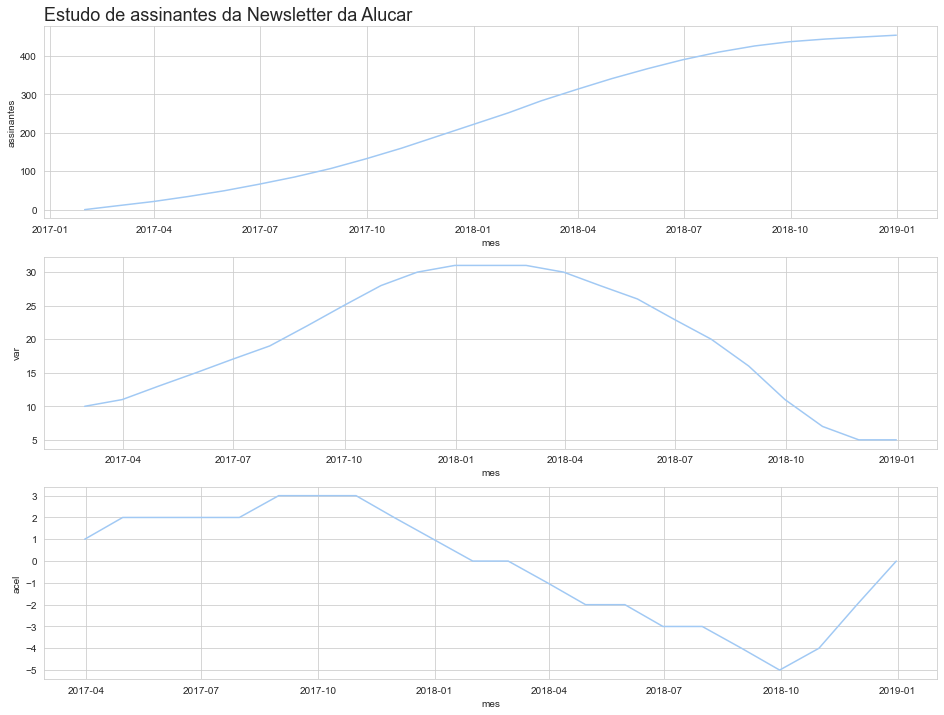

In [9]:
plot_comp('mes','assinantes','var','acel',dados,'Estudo de assinantes da Newsletter da Alucar')